In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

# Data slit 
* 2000 img for train the model
* 1000 img for validation the model
* 1000 img for test the model

In [35]:
train_dir = r'C:/Users/lucho/Desktop/Programacion/Python/Github/100DaysOfCode/Machine_Learning_Python_R/Python/CNN/Cat_Vs_Dog/train/'
test_dir = r'C:/Users/lucho/Desktop/Programacion/Python/Github/100DaysOfCode/Machine_Learning_Python_R/Python/CNN/Cat_Vs_Dog/test/'
validation_dir = r'C:/Users/lucho/Desktop/Programacion/Python/Github/100DaysOfCode/Machine_Learning_Python_R/Python/CNN/Cat_Vs_Dog/validation/'

# Data preprosecing
* Read the pictures
* Decode the jpg content to RGB grid of pixel
* Convert these into floating point tensors
* Rescalate the pixel values (Between 0 and 255) to the (0,1) interval

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# In this proyect in the first part to avoid the overfitting we transfor the img and make dummy varaibles

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range= 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size= 32,
        class_mode="binary")

valid_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size= 32,
        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow import optimizers

In [10]:
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [11]:
history = model.fit(
        train_generator,
        # steps_per_epoch is number of batch*steps_per_epoch = number of img in the folder
        steps_per_epoch= 60,
        epochs= 100,
        validation_data= valid_generator,
        validation_steps=31,
        callbacks=[checkpoint_cb])

Epoch 1/100
60/60 [==============================] - 74s 1s/step - loss: 0.6979 - acc: 0.5041 - val_loss: 0.7127 - val_acc: 0.5020
Epoch 2/100
60/60 [==============================] - 60s 1s/step - loss: 0.6959 - acc: 0.5122 - val_loss: 0.6860 - val_acc: 0.5474
Epoch 3/100
60/60 [==============================] - 59s 977ms/step - loss: 0.6843 - acc: 0.5692 - val_loss: 0.6710 - val_acc: 0.5706
Epoch 4/100
60/60 [==============================] - 59s 986ms/step - loss: 0.6725 - acc: 0.5837 - val_loss: 0.6522 - val_acc: 0.6079
Epoch 5/100
60/60 [==============================] - 60s 990ms/step - loss: 0.6685 - acc: 0.5940 - val_loss: 0.6510 - val_acc: 0.6159
Epoch 6/100
60/60 [==============================] - 59s 987ms/step - loss: 0.6526 - acc: 0.6110 - val_loss: 0.6705 - val_acc: 0.5514
Epoch 7/100
60/60 [==============================] - 59s 977ms/step - loss: 0.6683 - acc: 0.5957 - val_loss: 0.6316 - val_acc: 0.6361
Epoch 8/100
60/60 [==============================] - 59s 986ms/step 

60/60 [==============================] - 59s 986ms/step - loss: 0.4569 - acc: 0.7768 - val_loss: 0.4567 - val_acc: 0.7863
Epoch 63/100
60/60 [==============================] - 59s 980ms/step - loss: 0.4948 - acc: 0.7568 - val_loss: 0.4632 - val_acc: 0.7692
Epoch 64/100
60/60 [==============================] - 61s 1s/step - loss: 0.4624 - acc: 0.7690 - val_loss: 0.4812 - val_acc: 0.7651
Epoch 65/100
60/60 [==============================] - 60s 1s/step - loss: 0.4590 - acc: 0.7807 - val_loss: 0.4461 - val_acc: 0.7883
Epoch 66/100
60/60 [==============================] - 60s 994ms/step - loss: 0.4693 - acc: 0.7768 - val_loss: 0.4737 - val_acc: 0.7752
Epoch 67/100
60/60 [==============================] - 60s 996ms/step - loss: 0.4575 - acc: 0.7839 - val_loss: 0.4612 - val_acc: 0.7752
Epoch 68/100
60/60 [==============================] - 59s 988ms/step - loss: 0.4644 - acc: 0.7706 - val_loss: 0.4922 - val_acc: 0.7621
Epoch 69/100
60/60 [==============================] - 59s 982ms/step - los

(0.0, 1.0)

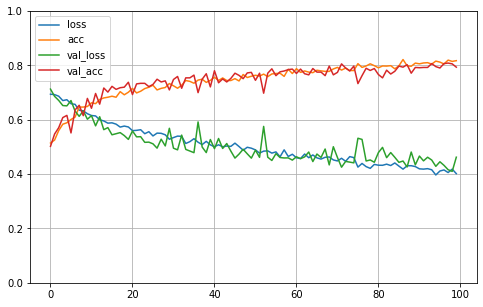

In [12]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [20]:
model = keras.models.load_model("Best_Model.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Architecture for CNN models
# VGG16

In [22]:
del model
keras.backend.clear_session()

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range= 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size= 20,
        class_mode="binary")

valid_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size= 20,
        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications import VGG16

In [25]:
con_base = VGG16(weights="imagenet",
                include_top = False,
                input_shape = (150,150,3))

58892288/58889256 [==============================] - 21s 0us/step


In [26]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [28]:
model = models.Sequential()
model.add(con_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 2e-5),
             metrics = ["acc"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model_vgg.h5", save_best_only=True)

In [32]:
history = model.fit(
        train_generator,
        # steps_per_epoch is number of batch*steps_per_epoch = number of img in the folder
        steps_per_epoch= 100,
        epochs= 30,
        validation_data= valid_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb])

Epoch 1/30
 45/100 [============>.................] - ETA: 8:27 - loss: 0.7064 - acc: 0.5493

KeyboardInterrupt: 

In [41]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size= 32,
        class_mode="binary")

Found 1000 images belonging to 2 classes.
